# 朴素贝叶斯垃圾邮件识别
---
## 一.案例介绍
电子邮件是互联网的一项重要服务，在大家的学习、工作和生活中会广泛使用。但是大家的邮箱常常被各种各样的垃圾邮件填充了。有统计显示，每天互联网上产生的垃圾邮件有几百亿近千亿的量级。  
因此，对电子邮件服务提供商来说，垃圾邮件过滤是一项重要功能。而朴素贝叶斯算法在垃圾邮件识别任务上一直表现非常好，至今仍然有很多系统在使用朴素贝叶斯算法作为基本的垃圾邮件识别算法。

本次实验数据集来自[Trec06](https://plg.uwaterloo.ca/cgi-bin/cgiwrap/gvcormac/foo06)的中文垃圾邮件数据集，目录解压后包含三个文件夹，其中data目录下是所有的邮件（未分词），已分词好的邮件在data_cut目录下。  
邮件分为邮件头部分和正文部分，两部分之间一般有空行隔开。标签数据在label文件夹下，文件中每行是标签和对应的邮件路径。‘spam’表示垃圾邮件，‘ham’表示正常邮件。


In [1]:
import os
import jieba
import re
import random

## 二.邮件正文文本特征以及标签提取

- **全部数据集**："./trec06c-utf8/data/"📂路径下 ***64620*** 条邮件📧

In [3]:
data_list=[] # 邮件文本特征列表（二维列表）
data_path="./trec06c-utf8/data/"
d_list=os.listdir(data_path)
for files in d_list:
    files_path=os.path.join(data_path,files)
    file_list=os.listdir(files_path)
    for file in file_list:
        file_path=os.path.join(files_path,file)
        with open(file_path,'r',encoding='utf-8') as f:
            # 忽略邮件头信息（邮件头与邮件正文之间有空行）
            while 1:
                head=f.readline()
                if head=='\n':
                    break
            text=f.read()
            # 提取文字（only）
            pre=re.compile(u'[\u4e00-\u9fa5]')
            text=re.findall(pre, text)
            text=''.join(text)
            
            wordcut=jieba.cut(text,cut_all=False)
            wordlist=list(wordcut)
            
            data_list.append(wordlist)
            f.close()
# 显示最后一封封邮件的文本特征以及导入邮件数量
print(data_list[-1])
print(len(data_list))

['贵', '公司', '负责人', '经理', '财务', '您好', '我', '是', '深圳市', '康特', '实业', '有限公司', '本', '公司', '在', '全国', '各地', '设有', '分公司', '广州', '东莞', '等市', '有', '分公司', '因', '全国', '各', '分公司', '进项', '较多现', '完成', '不了', '每月', '销售额', '度', '每月', '有', '一部分', '增值税', '电脑', '发票', '或', '海关', '缴款', '书以', '左右', '及', '普通', '国税', '地税', '向', '外代', '开', '或', '合作', '发票', '种类', '如下', '商品', '统一', '销售', '电脑', '版', '运输', '服务业', '广告', '建筑工程', '租赁', '专用', '等', '发票', '以上', '各类', '发票', '可以', '根据', '贵', '公司', '数量', '大小', '来', '衡量', '优惠', '的', '点数', '更', '希望', '有', '机会', '与', '贵司', '合作', '贵', '公司', '在', '发票', '的', '真伪', '方面', '有', '任何', '疑虑', '或', '担心', '可以', '上网', '查证', '真伪', '或', '直接', '去', '税务局', '验证', '本', '公司', '郑重', '承诺', '所用', '绝对', '是', '真票', '此', '信息', '长期有效', '联系方式', '如下', '联系人', '杨益明', '联系', '手机', '顺祝', '商祺']
64620


In [4]:
label_list=[] # 邮件标签列表
label_path="./trec06c-utf8/label/index"
with open(label_path,'r',encoding='utf-8') as f:
    for i in range(len(data_list)):
        label=f.readline()
        if "spam" in label:
            label_list.append(1)
        else:
            label_list.append(0)
    f.close()
# 显示标签 1：spam，0：ham
print(label_list[:300:1])
print(len(label_list))

[1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
64620


## 三.划分训练集和测试集

- 训练集 : 测试集（***8:2***）✂️

In [5]:
from sklearn.model_selection import train_test_split
train_data_list, test_data_list, train_class_list, test_class_list = \
train_test_split(data_list,label_list, test_size=0.2,random_state=250)

## 四.特征选择（词表构建）

In [6]:
# 将所有特征汇总计数排序
all_words_dict = {}
for word_list in train_data_list:
        for word in word_list:
            if word in all_words_dict.keys():
                all_words_dict[word] += 1
            else:
                all_words_dict[word] = 1
#根据键的值倒序排序             
all_words_tuple_list = sorted(all_words_dict.items(), key = lambda f:f[1], reverse = True)
all_words_list, all_words_nums = zip(*all_words_tuple_list)
all_words_list = list(all_words_list)

In [7]:
# 导入word.text（包含的词对分类没有太大的影响，需要在构建词表时去除）
words_set = set()
with open("./word.txt", 'r', encoding = 'utf-8') as f:
    for line in f.readlines():
        word = line.strip()  
        if len(word) > 0:
            words_set.add(word)
print(words_set)

{'乃至', '此间', '说来', '以上', '不尽然', '向着', '如此', '要不然', '来说', '诸', '与否', '倘若', '多么', '朝着', '经过', '别', '某些', '啦', '再有', '除了', '以免', '如何', '那样', '固然', '今', '例如', '跟', '如', '一些', '正值', '怎么样', '所', '不过', '可是', '因为', '曾', '鉴于', '要是', '依据', '得', '看', '不然', '既然', '何况', '又及', '凭借', '光是', '后', '不但', '从', '来自', '自从', '除外', '赖以', '吧', '此次', '凡是', '或', '不仅仅', '正巧', '或是', '尔', '谁人', '一来', '若是', '非但', '而', '们', '并不', '嘻嘻', '受到', '简言之', '大家', '遵循', '要么', '嘿嘿', '便于', '即使', '首先', '有些', '还要', '按照', '得了', '至今', '你们', '的话', '本地', '本身', '给', '只消', '不光', '连带', '然后', '为了', '才能', '随着', '作为', '每', '连同', '据此', '两者', '为着', '儿', '怎么办', '以至', '比如', '而且', '其余', '至', '随后', '虽然', '那里', '之所以', '只限', '加以', '当', '对于', '似的', '全体', '别人', '怎么', '不只', '着', '一切', '不', '除此', '而已', '这样', '但', '的', '以', '后者', '并', '正是', '以及', '此时', '别处', '只有', '某个', '个别', '加之', '哟', '只因', '他', '不至于', '并非', '毋宁', '可见', '尽管', '总之', '关于', '既往', '不仅', '在', '本人', '只是', '虽说', '可', '拿', '因之', '如果说', '而外', '他人', '某', '而后', '是', '则', '若', '有的', '出来', '用', '因

In [8]:
'''
函数说明：构建词表
Parameters:
    all_words_list - 所有词汇表（根据出现次数从大到小排列）
    feature_num - 特征数量
    words_set - 去除词汇表
Returns:
    feature_words - 词表（用于构建模型）
'''
def words_dict(all_words_list, feature_num, words_set = set()):
    feature_words = []
    n = 1
    for t in range(len(all_words_list)):
        if n > feature_num:
            break                               
        if all_words_list[t] not in words_set and 1 < len(all_words_list[t]) < 5:
            feature_words.append(all_words_list[t])
        n += 1   
    return feature_words

In [9]:
'''
函数说明：文本特征向量化
Parameters:
    train_data_list - 训练集
    test_data_list - 测试集
    feature_words - 词表
Returns:
    train_feature_list - 训练集文本特征向量
    test_feature_list - 测试集文本特征向量
'''
def TextFeatures(train_data_list, test_data_list, feature_words):
    def text_features(text, feature_words):                                          
        text_words = set(text)
        features = [1 if word in text_words else 0 for word in feature_words]
        return features
    train_feature_list = [text_features(text, feature_words) for text in train_data_list]
    test_feature_list = [text_features(text, feature_words) for text in test_data_list]
    return train_feature_list, test_feature_list

## 五.模型构建


### 🧰***sklearn*** 实现，***MultinomialNB*** ：先验为多项式分布的朴素贝叶斯

- alpha：浮点型可选参数，默认为1.0，其实就是添加拉普拉斯平滑，即为上述公式中的λ ，如果这个参数设置为0，就是不添加平滑；
- fit_prior：布尔型可选参数，默认为True。布尔参数fit_prior表示是否要考虑先验概率，如果是false, 则所有的样本类别输出都有相同的类别先验概率。  
  否则可以自己用第三个参数class_prior输入先验概率，或者不输入第三个参数class_prior让MultinomialNB自己从训练集样本来计算先验概率，此时的先验概率为  
  $P(V=v_j)=m_j/m$  
  其中 $m$ 为训练集样本总数量，$m_j$ 为输出为第 $j$ 类别的训练集样本数；
- class_prior：可选参数，默认为None；


In [10]:
from sklearn.naive_bayes import MultinomialNB
'''
函数说明：贝叶斯模型构建
Parameters:
    train_data_list - 训练集特征
    test_data_list - 测试集特征
    train_class_list - 训练标签
Returns:
    predict_class_list - 预测标签
'''
def NBclassifier(train_feature_list,test_feature_list,train_class_list):
    classifier = MultinomialNB().fit(train_feature_list, train_class_list)
    predict_class_list=classifier.predict(test_feature_list)
    return predict_class_list

### ♟️扩展：**自主** 实现, **二分类朴素贝叶斯模型**
- 假设目标函数 $f:X\rightarrow V$, 其中每个样本 $x=(a_1,a_2,...,a_n)$  
  那么最有可能的 $f(X)$ 的值是：  
$v_{MAP}=\underset{v_j\in V}{\mathrm{argmax}} P(x|v_j)P(v_j)$
- 朴素贝叶斯假设：  
$P(x|v_j)=P(a_1,a_2,...,a_n|v_j)=\prod_i P(a_i|v_j)$
  - 🧩**拉普拉斯平滑**🧩(***Laplace Smoothing***) 又被称为加1平滑，为了解决0概率问题:  
$P(a_i|v_j)=\frac{m_{il}+\lambda}{m_j+n\lambda}$  
其中, $P(a_i|v_j)$ 是第 $j$ 个类别的第 $i$ 维特征的第 $l$ 个取值的条件概率。  
$m_j$ 是训练集中输出为第 $j$ 类的样本个数。$\lambda$ 为一个大于0的常数，常常取值为1，即拉普拉斯平滑，也可以取其他值。
- 朴素贝叶斯分类器：  
📌 $v_{NB}=\underset{v_j\in V}{\mathrm{argmax}}  \{\log{P(v_j)}+\sum_i \log{P(a_i|v_j)}\}$ 📌  
取对数可以防止下溢出。

In [11]:
import numpy as np
# 二分类朴素贝叶斯模型
class NB:
    def __init__(self) -> None:
        self.p0Vect=[]
        self.p1Vect=[]
        self.pAbusive=0.5
        
    '''
    函数说明：训练
    Parameters:
        x - 训练集features
        y - 训练集labels
    Returns:
        self.p0Vect - P(w0|0),P(w1|0),P(w2|0)···
        self.p1Vect - P(w0|1),P(w1|1),P(w2|1)···
        self.pAbusive - 先验概率
    '''
    def fit(self,x,y):
        numsample=len(x)
        numfeature=len(x[0])
        self.pAbusive = sum(y)/float(numsample)
        p0Num = np.ones(numfeature); p1Num = np.ones(numfeature)
        # 分母初始化为2,拉普拉斯平滑
        p0Denom = 2.0; p1Denom = 2.0
        for i in range(numsample):
            if y[i] == 1:
                p1Num += x[i]
                p1Denom += sum(x[i])
            else:
                p0Num += x[i]
                p0Denom += sum(x[i])
        # 取对数，防止下溢出
        self.p1Vect = np.log(p1Num/p1Denom)
        self.p0Vect = np.log(p0Num/p0Denom)
        return self.p0Vect,self.p1Vect,self.pAbusive
    
    '''
    函数说明：预测
    Parameters:
        x_test - 测试集features
    Returns:
        yp - 回归预测结果
    ''' 
    def predict(self,x_test):
        py=[]
        for x in x_test:
            p1 = sum(x * self.p1Vect) + np.log(self.pAbusive)
            p0 = sum(x * self.p0Vect) + np.log(1.0 - self.pAbusive)
            if p1 > p0:
                py.append(1)
            else:
                py.append(0)
        return py
        

In [12]:
'''
函数说明：二分类朴素贝叶斯模型构建
Parameters:
    train_data_list - 训练集特征
    test_data_list - 测试集特征
    train_class_list - 训练标签
Returns:
    Predict_class_list - 预测标签
'''
def NBTest(train_feature_list,test_feature_list,train_class_list):
    Classifier = NB()
    Classifier.fit(train_feature_list, train_class_list)
    Predict_Class_List=Classifier.predict(test_feature_list)
    return Predict_Class_List

## 六.对比特征数目（词表大小）对模型效果的影响

测试特征数目从500到1500对模型效果的影响：

- 📐分别画出了feature_num对以下指标的影响趋势  
  准确率 ***Accuracy***
  精准率 ***Precision***
  召回率 ***Recall***

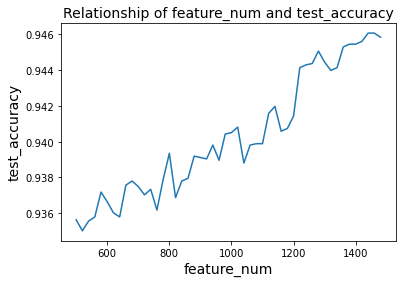

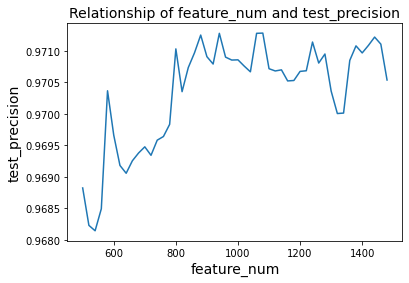

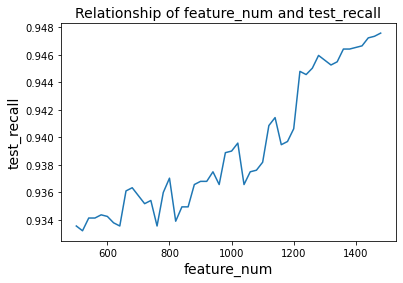

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

acc_list = []
prec_list = []
rec_list = []

feature_num_list = range(500, 1500, 20)
for feature_num in feature_num_list:
    feature_words = words_dict(all_words_list, feature_num, words_set)
    train_feature_list, test_feature_list = TextFeatures(train_data_list, test_data_list, feature_words)
    predict_class_list = NBclassifier(train_feature_list, test_feature_list, train_class_list)
    
    acc_list.append(accuracy_score(test_class_list,predict_class_list))
    prec_list.append(precision_score(test_class_list,predict_class_list))
    rec_list.append(recall_score(test_class_list,predict_class_list))
    
plt.figure()
plt.plot(feature_num_list, acc_list)
plt.title('Relationship of feature_num and test_accuracy',fontsize=14)
plt.xlabel('feature_num',fontsize=14)
plt.ylabel('test_accuracy',fontsize=14)
plt.show()

plt.figure()
plt.plot(feature_num_list, prec_list)
plt.title('Relationship of feature_num and test_precision',fontsize=14)
plt.xlabel('feature_num',fontsize=14)
plt.ylabel('test_precision',fontsize=14)
plt.show()

plt.figure()
plt.plot(feature_num_list, rec_list)
plt.title('Relationship of feature_num and test_recall',fontsize=14)
plt.xlabel('feature_num',fontsize=14)
plt.ylabel('test_recall',fontsize=14)
plt.show()

## 七.测试集分类结果分析

- 选取2500个特征构建词表训练模型💯  
准确率 ***Accuracy***、精准率 ***Precision***、召回率 ***Recall***均超过 ***90%***

In [14]:
feature_words = words_dict(all_words_list, 2500, words_set)
print("词表(数量2500)显示前300个特征:\n",feature_words[:300:1])
train_feature_list, test_feature_list = TextFeatures(train_data_list, test_data_list, feature_words)
# sklearn模型
predict_class_list=NBclassifier(train_feature_list,test_feature_list,train_class_list)
print("sklearn模型准确率:",accuracy_score(test_class_list,predict_class_list))
print("sklearn模型精确率:",precision_score(test_class_list,predict_class_list))
print("sklearn模型召回率:",recall_score(test_class_list,predict_class_list))

词表(数量2500)显示前300个特征:
 ['公司', '管理', '企业', '一个', '发票', '有限公司', '没有', '工作', '服务', '中国', '合作', '网站', '培训', '信息', '咨询', '优惠', '时间', '分析', '问题', '联系人', '产品', '朋友', '现在', '提供', '客户', '需要', '知道', '电话', '时候', '广告', '发展', '您好', '深圳市', '我司', '电脑', '每月', '觉得', '希望', '业务', '技术', '生产', '销售', '注册', '实业', '课程', '经理', '免费', '代开', '专业', '方法', '财务', '系统', '点数', '邮件', '方面', '设计', '左右', '手机', '北京', '网络', '上网', '国际', '联系', '项目', '进行', '深圳', '机会', '广州', '增值税', '直接', '方式', '贵司', '采购', '上海', '控制', '市场', '案例', '运输', '集团', '负责人', '一次', '软件', '很多', '能力', '小时', '已经', '承诺', '喜欢', '全国', '通过', '欢迎', '代理', '使用', '收入', '进项', '一起', '一直', '信息化', '绝对', '生活', '美国', '可能', '不能', '要求', '开始', '良好', '费用', '营销', '人员', '商祺', '成功', '分公司', '完成', '邮箱', '数量', '国内', '组织', '了解', '供应商', '内容', '比较', '会员', '顺祝', '成本', '地税', '选择', '介绍', '能够', '报名', '来电', '大小', '价格', '目标', '付款', '不要', '海关', '成为', '中心', '不会', '参加', '战略', '包括', '投资', '资料', '学习', '有效', '员工', '地址', '不了', '感觉', '事情', '计划', '香港', '报告', '建立', '世界', '所用', '部分', '郑重', '年月日', '行业', '

In [15]:
# 自主实现模型
Predict_Class_List=NBTest(train_feature_list,test_feature_list,train_class_list)
print("自主实现模型准确率:",accuracy_score(test_class_list,Predict_Class_List))
print("自主实现模型精确率:",precision_score(test_class_list,Predict_Class_List))
print("自主实现模型召回率:",recall_score(test_class_list,Predict_Class_List))

自主实现模型准确率: 0.9484679665738162
自主实现模型精确率: 0.972106824925816
自主实现模型召回率: 0.9500057997912075
